## Application filtre gaussien

In [117]:
import numpy as np
import argparse
import glob
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('71a8491a-993c-4338-b9c6-8a089673feef_image.jpg')
image = imutils.resize(image, height = 300)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

## Différents paramètres de detection de contour avec Canny

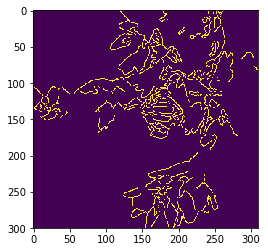

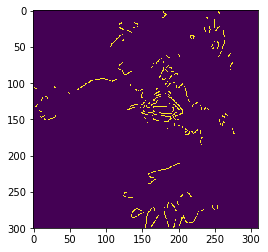

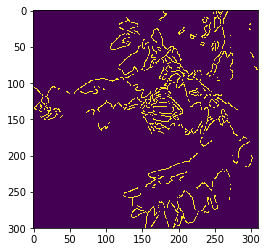

In [118]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)

	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)

	# return the edged image
	return edged


# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

plt.imshow(wide)
plt.show()

plt.imshow(tight)
plt.show()

plt.imshow(auto)
plt.show()

In [119]:
# find contours in the edged image, keep only the largest
# ones, and initialize our screen contour

cnts = cv2.findContours(wide.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

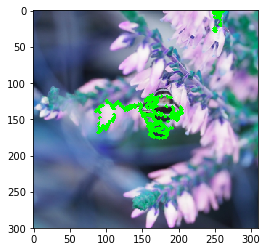

In [120]:
for contour in cnts:
    area = cv2.contourArea(contour)
    cv2.drawContours(image, contour, -1, (0, 255, 0), 3)
    plt.imshow(image)

Beaucoup de contours correspondent au décors autour de l'insecte

## Detection de contour sans Canny 

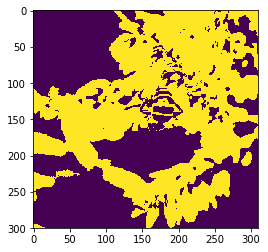

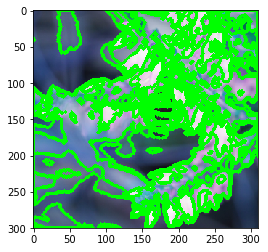

In [132]:
ret,thresh = cv2.threshold(gray,127,255,0)
plt.imshow(thresh)
plt.show()
im2, contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.drawContours(image, im2, -1, (0,255,0), 3))

Les contours sont encore moins exclusifs à l'insecte